Часть материала украдена из курса "Глубинное обучение" ФКН ВШЭ https://www.hse.ru/ba/ami/courses/205504078.html, за что им большое спасибо.

Актуальная версия этого ноутбука обретается по адресу
https://github.com/nadiinchi/dl_labs/blob/master/lab_pytorch.ipynb

# Устанавливаем pytorch

## Linux/OSX


На оффсайте http://pytorch.org/ надо выбрать подходящую конфигурацию и скачать.

Версию python можно узнать в терминале:
```
python --version
```


## Windows without GPU

Проще всего поставить при помощи конды:
```
conda install -c peterjc123 pytorch
```

## Windows with GPU

Смотрите https://github.com/peterjc123/pytorch-scripts

![img](https://s1.postimg.org/6fl45xnvnj/pytorch-logo-dark.png)

In [1]:
import torch
import numpy as np

In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n %s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", np.dot(x, x.T))
print("mean over cols :\n%s" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s" % (np.cumsum(x, axis=0)))

X :
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
X*X^T  :
 [[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
mean over cols :
[  1.5   5.5   9.5  13.5]
cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]


In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

y = torch.from_numpy(x)
print('Type of y:', type(y))
y = torch.from_numpy(x).type(torch.FloatTensor)
print('Type of y', type(y))

Type of y: <class 'torch.LongTensor'>
Type of y <class 'torch.FloatTensor'>


In [4]:
x = torch.arange(0,16).view(4,4)
print('Type of x:', type(x))

print("X :\n%s" % x)
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n", torch.matmul(x, x.transpose(1, 0)))
print("mean over cols :\n", torch.mean(x, dim=-1))
print("cumsum of cols :\n", torch.cumsum(x, dim=0))

Type of x: <class 'torch.FloatTensor'>
X :

  0   1   2   3
  4   5   6   7
  8   9  10  11
 12  13  14  15
[torch.FloatTensor of size 4x4]

add 5 :

  5   6   7   8
  9  10  11  12
 13  14  15  16
 17  18  19  20
[torch.FloatTensor of size 4x4]

X*X^T  :
 
  14   38   62   86
  38  126  214  302
  62  214  366  518
  86  302  518  734
[torch.FloatTensor of size 4x4]

mean over cols :
 
  1.5000
  5.5000
  9.5000
 13.5000
[torch.FloatTensor of size 4]

cumsum of cols :
 
  0   1   2   3
  4   6   8  10
 12  15  18  21
 24  28  32  36
[torch.FloatTensor of size 4x4]



## NumPy vs Pytorch

Numpy и Pytorch не требуют описания статического графа вычислений. 

Можно отлаживаться с помощью pdb или просто print.

API несколько различается:

```
x.reshape([1,2,8]) -> x.view(1,2,8)
x.sum(axis=-1) -> x.sum(dim=-1)
x.astype('int64') -> x.type(torch.LongTensor)
```


Легко конвертировать между собой:

```
torch.from_numpy(npx) -- вернет Tensor
tt.numpy() -- вернет Numpy Array
```


Если что:
- смотрите документацию
- гуглите (Stackoverflow/tutorials)

In [5]:
x = torch.linspace(0, 2 * np.pi, 16)

# Mini-task: compute a vector of sin^2(x) + cos^2(x)
out = torch.sin(x)**2 + torch.cos(x)**2

print(out.numpy())

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


## In-place operations

Когда работаем с большими массивами, память надо экономить.
Некоторые операции происходят с созданием нового объекта – результата вычислений,
некоторые изменяют данный объект (in-place операции).
В pytorch обычно эти операции различаются добавлением подчеркивания:
```
x.exp()   # not-in-place operation
x.exp_()  # in-place operation
```

In [6]:
x = torch.arange(4)
print('Not-in-place:')
print('\tx.exp():\t\t', x.exp().numpy())
print('\tx:\t\t\t', x.numpy())
print('In-place:')
print('\tx.exp_():\t\t', x.exp_().numpy())
print('\tx after x.exp_():\t', x.numpy())

Not-in-place:
	x.exp():		 [  1.           2.71828175   7.38905621  20.08553696]
	x:			 [ 0.  1.  2.  3.]
In-place:
	x.exp_():		 [  1.           2.71828175   7.38905621  20.08553696]
	x after x.exp_():	 [  1.           2.71828175   7.38905621  20.08553696]


In [7]:
x = torch.arange(0, 4).view(2, 2)
y = torch.arange(4, 8).view(2, 2)
z = torch.arange(8, 12).view(2, 2)

# Not-in-place:
u = x + 2 * y - z    # 3 array allocations?
print(u.numpy())

# In-place
u = y.clone()        # 1 array allocation
u.mul_(2)
u.add_(x)
u.sub_(z)
print(u.numpy())

[[ 0.  2.]
 [ 4.  6.]]
[[ 0.  2.]
 [ 4.  6.]]


## Broadcasting на pytorch (аналогично numpy)

In [8]:
a = torch.Tensor([1, 1, 1, 2]).view(4, 1)
b = torch.Tensor([1, 0, 1, 0]).view(1, 4)
c = torch.randn(16).view(4, 4)
print('a:', a)
print('b:', b)
print('a + b:', a + b)
print('c:', c)
print('b + c:', b + c)

a: 
 1
 1
 1
 2
[torch.FloatTensor of size 4x1]

b: 
 1  0  1  0
[torch.FloatTensor of size 1x4]

a + b: 
 2  1  2  1
 2  1  2  1
 2  1  2  1
 3  2  3  2
[torch.FloatTensor of size 4x4]

c: 
-1.5156  0.4265  0.3472 -0.6855
 0.7468 -0.5077  0.4843 -0.2762
 1.1128 -0.6938 -0.0897  0.0438
 0.0192  0.7684  1.1240 -0.3300
[torch.FloatTensor of size 4x4]

b + c: 
-0.5156  0.4265  1.3472 -0.6855
 1.7468 -0.5077  1.4843 -0.2762
 2.1128 -0.6938  0.9103  0.0438
 1.0192  0.7684  2.1240 -0.3300
[torch.FloatTensor of size 4x4]



Более подробную информацию можно найти на http://pytorch.org/docs/master/notes/broadcasting.html

## Работа с тензорами

Дано 100 объектов, каждый из которых описывается 10-мерным вектором, и 5 точек, каждая из которых также задается 10-мерным вектором. Объекты лежат в матрице X, точки – в матрице Y.

Надо для каждого объекта из X найти индекс ближайшей точки из Y только с помощью операций над тензорами
(нельзя использовать циклы, list comprehensions, рекурсию, etc,
потому что решение с ними будет работать в несколько раз или на несколько порядков медленнее).

In [9]:
X = torch.randn(100, 10)
Y = torch.randn(5, 10)

Решение с семинара:

In [10]:
((X.view(100, 1, 10) - Y.view(1, 5, 10)) ** 2).sum(dim=-1).min(dim=-1)[1].numpy()

array([2, 1, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 3, 3,
       0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 4, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       2, 3, 2, 0, 3, 3, 2, 2, 1, 4, 1, 4, 1, 2, 0, 4, 2, 0, 3, 1, 1, 0, 4,
       2, 2, 2, 2, 2, 3, 1, 4])

Это решение плохо тем, что в качестве промежуточного результата вычилений в нем присутствует трехмерный тензор,
который занимает $O(NMD)$ памяти, где N – число объектов, M – число точек, D – размерность пространства.

## Внимание, задача!
Утверждается, что есть другое решение с такой же скоростью работы,
но использующее $O(NM)$ памяти для результатов промежуточных вычислений.
Предлагается найти его.

Подсказка: найти матрицу попарных скалярных произведений между объектами
и точками можно с помощью одного матричного умножения.

In [11]:
# your code here


array([2, 1, 0, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 1, 3, 3,
       0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 4, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 4, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1,
       2, 3, 2, 0, 3, 3, 2, 2, 1, 4, 1, 4, 1, 2, 0, 4, 2, 0, 3, 1, 1, 0, 4,
       2, 2, 2, 2, 2, 3, 1, 4])

## CUDA
`x.cuda()` копирует тензор на GPU и возвращает объект, соответствующий этому скопированному тензору.
Можно явно указать номер GPU, на который нужно скопировать тензор: `x.cuda(gpu_id)`.
Если тензор уже лежал на нужном GPU, то возвращается сам тензор, копирования не производится.
Аналогично работает `x.cpu()`. 

Операции можно осуществлять только над тензорами, лежащими на одном устройстве.
Нарушение этого правила приводит к ошибке.
Результат операции находится на том же устройстве, что и операнды.

# Tensor vs Variable

http://pytorch.org/docs/master/autograd.html#variable

`Variable` – обертка над Tensor для использования в вычислительных графах. Позволяет вычислять градиенты автоматически.

Tensor и Variable конвертируются друг в друга:
```
tensor to variable: Variable(x)
variable to tensor: x.data
```

Нельзя смешивать Tensor и Variable в одной операции.

Некоторые операции могут работать только с тензорами, некоторые только с переменными (torch.nn.functional.whatever).

In [12]:
from torch.autograd import Variable

sequence = torch.randn(1, 8, 10)
filters = torch.randn(2, 8, 3)
a = torch.randn(5)
b = torch.randn(5)

In [13]:
# works:
print('sum of Variables:')
print(Variable(a) + Variable(b))

sum of Variables:
Variable containing:
 0.9240
 0.9564
 4.3621
-1.7138
 0.0694
[torch.FloatTensor of size 5]



In [14]:
# will not work:
print('sum of Variable and Tensor:')
print(Variable(a) + b)

sum of Variable and Tensor:


RuntimeError: add() received an invalid combination of arguments - got (torch.FloatTensor), but expected one of:
 * (float other, float alpha)
 * (Variable other, float alpha)


In [15]:
# works:
print('conv1d over Variables:')
print(torch.nn.functional.conv1d(Variable(sequence), Variable(filters)))

conv1d over Variables:
Variable containing:
(0 ,.,.) = 
 -6.3957 -0.9862  1.7453  5.0739 -5.6403 -0.8131 -1.6775 -3.7941
 -0.0211 -3.5564 -4.0188  6.0429 -2.6536  1.4192 -0.7251 -3.7977
[torch.FloatTensor of size 1x2x8]



In [16]:
# will not work
print("conv1d (tensors):")
print(torch.nn.functional.conv1d(sequence, filters))

conv1d (tensors):


TypeError: argument 0 is not a Variable

# Automatic gradients

Автоматическое вычисление градиентов:

1. Создать переменную: `a = Variable(..., requires_grad=True)`

2. Определить какую-нибудь дифференцируемую _скалярную_ функцию `loss = whatever(a)`

3. Запросить обратный проход `loss.backward()`

4. Градиенты будут доступны в `a.grads`


Есть два важных отличия Pytorch от Theano/TF:

1. Функцию ошибки можно изменять динамически, например на каждом минибатче.

2. После вычисления `.backward()` градиенты сохраняются в `.grad` каждой задействованной переменной, при повторных вызовах градиенты суммируются. Это позволяет использовать несколько функций ошибок или виртуально увеличивать batch_size. Поэтому после каждого шага оптимизатора градиенты стоит обнулять.

### Простой пример использования

In [17]:
x_tensor = torch.randn(4)
y_tensor = torch.randn(4)
x = Variable(x_tensor, requires_grad=True)
y = Variable(y_tensor, requires_grad=True)
z = x * y + 10
p = z.sum()
p.backward()
print('x:', x.data)
print('y:', y.data)
print('dp / dx:', x.grad.data)
print('dp / dy:', y.grad.data)

x: 
 1.4730
-1.7276
 0.7120
 0.9192
[torch.FloatTensor of size 4]

y: 
 0.9468
-1.2150
-1.5024
 0.6761
[torch.FloatTensor of size 4]

dp / dx: 
 0.9468
-1.2150
-1.5024
 0.6761
[torch.FloatTensor of size 4]

dp / dy: 
 1.4730
-1.7276
 0.7120
 0.9192
[torch.FloatTensor of size 4]



### Обнуление градиентов

In [18]:
x_tensor = torch.Tensor([1, 1, 1, 1])
x = Variable(x_tensor, requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())
x.data -= 0.5
y = 1 / x
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())

x: [ 1.  1.  1.  1.]
dp / dx: [ 2.  2.  2.  2.]
x: [ 0.5  0.5  0.5  0.5]
dp / dx: [-2. -2. -2. -2.]


In [19]:
x_tensor = torch.Tensor([1, 1, 1, 1])
x = Variable(x_tensor, requires_grad=True)
y = x ** 2
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())
x.grad.detach_()       # extracting gradient Variable from the previous computational graph (optional)
x.grad.data.zero_()    # zero gradinents
x.data -= 0.5
y = 1 / x
p = y.sum()
p.backward()
print('x:', x.data.numpy())
print('dp / dx:', x.grad.data.numpy())

x: [ 1.  1.  1.  1.]
dp / dx: [ 2.  2.  2.  2.]
x: [ 0.5  0.5  0.5  0.5]
dp / dx: [-4. -4. -4. -4.]


## Leaf vs Non-leaf Variable

Градиенты будут сохранены и доступны для использования только для `leaf-variable`.
Такое поведение по умолчанию сделано ради экономии памяти.

In [20]:
x = Variable(torch.randn(4), requires_grad=True)  # leaf variable
y = x + 1                                         # not a leaf variable
p = y.sum()                                       # not a leaf variable
p.backward()
print('x.data:', x.data.numpy())
print('y.data:', y.data.numpy())
print('p.data:', p.data.numpy())
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad)
print('p.grad:', p.grad)

x.data: [-1.09473073 -0.83525252  1.05651534 -0.73443204]
y.data: [-0.09473073  0.16474748  2.05651522  0.26556796]
p.data: [ 2.39209986]
x.grad: [ 1.  1.  1.  1.]
y.grad: None
p.grad: None


In [21]:
x = Variable(torch.randn(4), requires_grad=True)  # leaf variable
y = Variable(torch.randn(4), requires_grad=True)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad.data.numpy())
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: [ 1.  1.  1.  1.]
y.grad: [ 1.  1.  1.  1.]
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


## Листовые вершины без градиентов
Листовые вершины, в которых не требуется вычислять градиент, создаются с помощью `Variable(..., requires_grad=False)`.
Для корректного вызова `.backward()` требуется, чтобы хотя бы для одной листовой вершины требовался градиент.

In [22]:
x = Variable(torch.randn(4), requires_grad=True)   # leaf variable
y = Variable(torch.randn(4), requires_grad=False)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()
print('x.grad:', x.grad.data.numpy())
print('y.grad:', y.grad)
print('z.grad:', z.grad)
print('p.grad:', p.grad)
print('x.is_leaf:', x.is_leaf)
print('y.is_leaf:', y.is_leaf)
print('z.is_leaf:', z.is_leaf)
print('p.is_leaf:', p.is_leaf)

x.grad: [ 1.  1.  1.  1.]
y.grad: None
z.grad: None
p.grad: None
x.is_leaf: True
y.is_leaf: True
z.is_leaf: False
p.is_leaf: False


Обратите внимание, что для вычисления градиента нужно, чтобы хотя бы одна листовая вершина графа вычисления функции
имела `requires_grad=True`.

In [23]:
# will not work:
x = Variable(torch.randn(4), requires_grad=False)  # leaf variable
y = Variable(torch.randn(4), requires_grad=False)  # leaf variable
z = x + y    # not a leaf variable
p = z.sum()  # not a leaf variable
p.backward()

RuntimeError: element 0 of variables does not require grad and does not have a grad_fn

## Градиенты промежуточных вершин
Для промежуточных вершин мы можем запросить сохранение градиентов с помощью функции `.retain_grad()`.

In [24]:
x = Variable(torch.randn(4), requires_grad=True)   # leaf variable
z = Variable(torch.randn(4), requires_grad=True)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()
print('dp / dx:', x.grad.data.numpy())
print('dp / dw:', w.grad.data.numpy())
print('dp / dz:', z.grad.data.numpy())

dp / dx: [ 1.92757583 -2.2354784   1.24162018  2.519238  ]
dp / dw: [ 0.79092884 -0.35837969 -1.23274362  0.46698242]
dp / dz: [ 1.58185768 -0.71675938 -2.46548724  0.93396485]


Обратим внимание, что даже при наличии в графе вычислений не-листовых вершин, требующих вычисления градиентов,
`.backward()` выдает ошибку.

In [25]:
# will not work
x = Variable(torch.randn(4), requires_grad=False)   # leaf variable
z = Variable(torch.randn(4), requires_grad=False)   # leaf variable
w = z * 2      # not a leaf variable
y = x * w + 1  # forward pass before retaining gradient is ok
p = y.sum()

w.retain_grad()

p.backward()

RuntimeError: element 0 of variables does not require grad and does not have a grad_fn

## Отстреливаем себе ноги (НЕ НАДО так делать)

Конвертировать Variable в Tensor и обратно:
backward pass не проходит через Tensor, даже если он был сконвертирован из другого Variable.

In [26]:
# x out of the computational graph
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(x.data * 2, requires_grad=True)   # the bad conversion is here
z = 3 * y + 1
p = z.mean()
p.backward()
print('dp / dx:', x.grad)
print('dp / dy:', y.grad.data.numpy())

dp / dx: None
dp / dy: [ 0.75  0.75  0.75  0.75]


Менять размерность тензоров в Variable, но не обнулять градиенты (`.grad.zero_()` сохраняет размер, `.grad = None` не сохраняет).

In [27]:
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
z = x * y + 1
z.sum().backward()
print('dz / dx:', x.grad.data.numpy())
print('dz / dy:', y.grad.data.numpy())

x.grad.zero_()
z.grad.zero_()
#x.grad = None
#z.grad = None

x.data = torch.Tensor([1, 2, 3])
y.data = torch.Tensor([1, 2, 3])
z = x * y + 1
z.sum().backward()
print('dz / dx:', x.grad.data.numpy())
print('dz / dy:', y.grad.data.numpy())

dz / dx: [ 1.  2.  3.  4.]
dz / dy: [ 1.  2.  3.  4.]


AttributeError: 'NoneType' object has no attribute 'zero_'

Менять значения Variable после вычисления каких-то других выражений с ним и рассчитывать,
что градиент от тех выражений будет учитывать новое значение.

In [28]:
x = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
y = torch.autograd.Variable(torch.Tensor([1, 2, 3, 4]), requires_grad=True)
z = y ** 2

z.data = torch.Tensor([1, 2, 3, 4])  # changing .data before computation matters
p = x * z
x.data = torch.Tensor([1, 1, 1])     # changing .data after computation doesn't affect gradients

p.sum().backward()
print('d p_sum / dx:', x.grad.data.numpy())
print('d p_sum / dy:', y.grad.data.numpy())

d p_sum / dx: [ 1.  2.  3.  4.]
d p_sum / dy: [  2.   8.  18.  32.]


Тысячи способов прострелить себе ногу, если использовать механизм автоматического дифференцирования
любым другим нетрадиционным образом.

## Пример задачи

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
X = torch.randn(50, 10)
b = torch.randn(2)
W = torch.randn(10, 2)

Наркоманская функция потерь, вынуждающая линейное преобразование переводить точки из многомерного пространства в двумерное на единичную окружность. Для оптимизации использовать градиентный спуск по параметрам преобразования.

Линейное преобразование точки $x$ из десятимерного пространства в точку $y$ двумерного пространства с весами преобразования $W$ и $b$:
$$y = Wx + b$$

Норма в двумерном пространстве – евклидова:
$$||y||_2 = \sqrt{y_1^2 + y_2^2}$$

Функция потерь $f_0$ штрафует расстояние от получившейся точки $y$ до единичной окружности:
$$f_0(x, W, b) = 0.5 \cdot \big| ||y||_2 - 1 \big| + \big( ||y||_2 - 1 \big)^2$$

К сожалению, оптимизация функции $f_0$ по $W$ и $b$ может быть проведена аналитически
и приводит к тривиальному решению $W = 0$, $b = (1, 0)$.
Чтобы избежать такого решения, вводим штраф на близость получившейся точки к вектору $b$, который обращается в 0, если расстояние до вектора $b$ более 1:
$$f_1(x, W, b) = \max\big(0, \frac{1}{||y - b||_2} - 1\big)$$

Итоговая функция потерь:
$$f(x, W, b) = f_0(x, W, b) + f_1(x, W, b)$$

Нужно решить следующую оптимизационную задачу:
$$\frac{1}{N}\sum\limits_{i = 1}^N f(x_i, W, b) \to \min\limits_{W, b}$$

In [31]:
def f(X, W, b):
    # your code here
    

In [32]:
print(f(X, W, b))

21.122261142730714


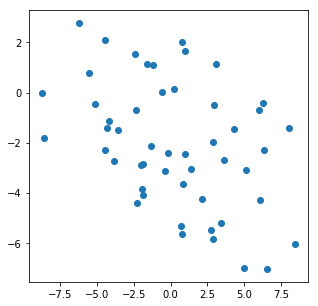

In [33]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

In [34]:
# your code here


0.842589
0.363394
0.307726
0.278642
0.262647
0.244216
0.222634
0.205349
0.197059
0.193335


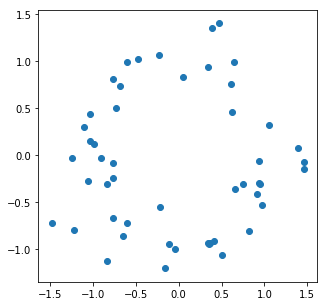

In [35]:
plt.figure(figsize=(5, 5))
Y = X.mm(W).add(b)
plt.scatter(Y[:, 0], Y[:, 1])

# Время писать нейросеть

## Загружаем данные

In [36]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X.shape, y.shape

((1797, 64), (1797,))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [38]:
X_train = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)
X_test = torch.from_numpy(X_test).type(torch.FloatTensor)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

Подсказка: нейросети крайне плохо обучаются, если подаваемые им на вход значения велики по модулю.
Поэтому перед обучением нейросети каждый признак независимо нормируют
(исключение – сверточные нейросети, там нормируют изображение поканально, а не попиксельно, но об этом потом).

Можно использовать разные нормировки.
Наиболее популярно вычитать среднее и делить на дисперсию (нужно внимательно подходить к этому методу,
когда выборочная дисперсия мала или равна нулю, и обрабатывать такие случаи отдельно).
Можно также вычитать медиану и делить на интерквартильный размах, масштабировать все данные в отрезок $[-1, 1]$, etc

Нужно реализовать свою нормировку данных здесь:

In [39]:
# your code here


## Определяем слои нейросети

In [40]:
class Module:
    def __init__(self):
        self.training = True
        self.children = []

    def forward(self, *input):
        raise NotImplementedError

    def parameters(self):
        """Returns list of parameters of module and its children."""
        res = []
        for submodule in self.children:
            res += submodule.parameters()
        for param in res:
            if not isinstance(param, Variable):
                raise Exception('Parameters must be Variables.')
        return res
    
    def zero_grad(self):
        """Sets gradients of all model parameters to zero."""
        for p in self.parameters():
            if p.grad is not None:
                p.grad.detach_()   # detachs gradient Variable from the computational graph
                p.grad.zero_()

    def train(self):
        """Sets module into train mode (for DropOut, BatchNorm, etc)."""
        self.training = True
        for submodule in self.children:
            submodule.train()

    def eval(self):
        """Sets module into evaluation mode."""
        self.training = False
        for submodule in self.children:
            submodule.eval()

In [41]:
class Dense(Module):
    def __init__(self, input_units, output_units):
        """A dense layer is a layer which performs a learned affine transformation:
        f(x) = W x + b
        """
        super(Dense, self).__init__()
        # initialize weights with small random numbers from normal distribution
        self.weights = None  # your code here
        self.biases = None   # your code here

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation:
        f(x) = W x + b
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        # your code here
        
        return output

In [42]:
class ReLU(Module):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs."""
        super(ReLU, self).__init__()

    def parameters(self):
        return []  # ReLU has no parameters
    
    def forward(self, input):
        """Applies elementwise ReLU to [batch, num_units] Variable matrix."""
        # your code here
        
        return output

In [43]:
class LogSoftmax(Module):
    def __init__(self):
        super(LogSoftmax, self).__init__()

    def parameters(self):
        return []
        
    def forward(self, input):
        """Applies softmax to each row and then applies component-wise log.
        Input shape:  [batch, num_units] (Variable)
        Output shape: [batch, num_units] (Variable)
        """
        # your code here
        
        return output

In [44]:
class MyNetwork(Module):
    def __init__(self, input_size, hidden_layers_size, hidden_layers_number, output_size):
        super(MyNetwork, self).__init__()

        network = []
        network.append(Dense(input_size, hidden_layers_size))
        network.append(ReLU())
        for i in range(hidden_layers_number - 1):
            network.append(Dense(hidden_layers_size, hidden_layers_size))
            network.append(ReLU())
        network.append(Dense(hidden_layers_size, output_size))
        network.append(LogSoftmax())

        self.children = network

    def forward(self, input):
        """Applies all layers of neural network to the input.
        Input shape:  [batch, num_units] (Variable)
        Output shape: [batch, num_units] (Variable)
        """
        # your code here
        
        return output

In [45]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)

## Определяем функцию потерь

In [46]:
def crossentropy(activations, target):
    """Returns negative log-likelihood of target under model
    represented by activations (log probabilities of classes).
    Activations shape: [batch, num_classes] (Variable)
    Target shape:      [batch]              (Variable)
    Output shape: 1 (scalar, Variable)
    """
    # your code here
    
    return loss

## Оптимизатор SGD

In [47]:
class SGDOptimizer:
    def __init__(self, parameters, learning_rate):
        self.parameters = parameters
        self.learning_rate = learning_rate

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        for param in self.parameters:
            param.data -= self.learning_rate * param.grad.data

In [48]:
import torch.utils.data

In [49]:
def run_epoch(dataset, network, prefix='Test loss:', optimizer=None):
    # Change mode for all layers.
    if optimizer:
        network.train()
    else:
        network.eval()

    batch_size = 100
    batchgenerator = torch.utils.data.DataLoader(dataset, batch_size, True)

    avg_loss = 0
    for i, (batch_data, batch_target) in enumerate(batchgenerator):
        batch_output = network.forward(Variable(batch_data))
        batch_loss = crossentropy(batch_output, Variable(batch_target))
        batch_loss.backward()
        batch_loss = batch_loss.data.numpy()[0]
        avg_loss += (batch_loss - avg_loss) / (i + 1)
        if optimizer:
            optimizer.step()
            network.zero_grad()
    print(prefix, avg_loss, flush=True)

In [50]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

network = MyNetwork(X_train.shape[1], 32, 1, 10)
sgd = SGDOptimizer(network.parameters(), 0.5)

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', sgd)
    run_epoch(test_dataset, network, 'Test loss:',  None)

Train loss: 2.25001299381
Test loss: 2.02255702019
Train loss: 0.935892488275
Test loss: 0.526892650127
Train loss: 0.311101637781
Test loss: 0.224462372065
Train loss: 0.162839947534
Test loss: 0.137114882469
Train loss: 0.116679061204
Test loss: 0.100092953444
Train loss: 0.0960424696761
Test loss: 0.0819583252072
Train loss: 0.0743240392102
Test loss: 0.0691537447274
Train loss: 0.0632074608334
Test loss: 0.0648413747549
Train loss: 0.0556773274605
Test loss: 0.0526380605996
Train loss: 0.0497626392171
Test loss: 0.0536358714104
Train loss: 0.0436364341793
Test loss: 0.0415103141218
Train loss: 0.0387461567963
Test loss: 0.0370218373835
Train loss: 0.0330237374375
Test loss: 0.0317714843899
Train loss: 0.0313186772567
Test loss: 0.0290575809777
Train loss: 0.0266977072959
Test loss: 0.0287078157067
Train loss: 0.0241593799022
Test loss: 0.0236087350175
Train loss: 0.0228125809559
Test loss: 0.0228643067181
Train loss: 0.0213984650826
Test loss: 0.0240131534636
Train loss: 0.01811318

## Больше оптимизаторов Б-гу Оптимизации!

In [51]:
class SGDMomentumOptimizer:
    def __init__(self, parameters, learning_rate=0.01, momentum=0.9):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.momentum = momentum
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [52]:
class RMSPropOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta=0.9, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta = beta
        self.eps = eps
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [53]:
class AdamOptimizer:
    def __init__(self, parameters, learning_rate=0.01, beta1=0.9, beta2=0.999, eps=1e-8):
        self.parameters = parameters
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        # your code here
        

    def step(self):
        """Make one optimization step for parameters in-place.
        Assumes that all parameters are Variable with computed gradient.
        """
        # your code here
        pass

In [54]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

In [55]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = SGDMomentumOptimizer(network.parameters(), 0.5)

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

Train loss: 2.29899907112
Test loss: 2.28840465546
Train loss: 2.17900568247
Test loss: 1.91997365952
Train loss: 1.19421473571
Test loss: 0.793489205837
Train loss: 0.455302154379
Test loss: 0.312181121111
Train loss: 0.230511957513
Test loss: 0.165832227468
Train loss: 0.123873262533
Test loss: 0.100607940555
Train loss: 0.0892768991845
Test loss: 0.0810534343123
Train loss: 0.0676086062033
Test loss: 0.0628551796079
Train loss: 0.0543780475855
Test loss: 0.0540404502302
Train loss: 0.0464387893943
Test loss: 0.0465289611369
Train loss: 0.040847371798
Test loss: 0.0428905472159
Train loss: 0.037239708339
Test loss: 0.0359449528158
Train loss: 0.0327466359096
Test loss: 0.0366176884621
Train loss: 0.0296002742834
Test loss: 0.0310783546418
Train loss: 0.0265897470526
Test loss: 0.0265863619745
Train loss: 0.0248268215385
Test loss: 0.0258533308282
Train loss: 0.0228131134063
Test loss: 0.0230030672625
Train loss: 0.0207394263042
Test loss: 0.0255728438497
Train loss: 0.0193641397969
T

In [56]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = RMSPropOptimizer(network.parameters())

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

Train loss: 1.04873784099
Test loss: 0.38672837019
Train loss: 0.227099137647
Test loss: 0.188070484996
Train loss: 0.132430793984
Test loss: 0.121710123122
Train loss: 0.0845916050353
Test loss: 0.0908883780241
Train loss: 0.0581328541573
Test loss: 0.0690488003194
Train loss: 0.0373754860567
Test loss: 0.0434633551165
Train loss: 0.0285121881004
Test loss: 0.0349668972194
Train loss: 0.0181794009903
Test loss: 0.0249595091678
Train loss: 0.0139850968761
Test loss: 0.0204672420397
Train loss: 0.0095160015127
Test loss: 0.019333433453
Train loss: 0.00756529153192
Test loss: 0.0102690941188
Train loss: 0.00454936275491
Test loss: 0.0070749043487
Train loss: 0.00344879847918
Test loss: 0.00430776766734
Train loss: 0.00373204343902
Test loss: 0.00334942489862
Train loss: 0.00152089097537
Test loss: 0.00197805096395
Train loss: 0.0013455981264
Test loss: 0.00142132241745
Train loss: 0.000820027600899
Test loss: 0.000827933556866
Train loss: 0.000583214284104
Test loss: 0.000719902419951
Tr

In [57]:
network = MyNetwork(X_train.shape[1], 32, 1, 10)
optim = AdamOptimizer(network.parameters())

num_epochs = 20
for i in range(num_epochs):
    run_epoch(train_dataset, network, 'Train loss:', optim)
    run_epoch(test_dataset, network, 'Test loss:',  None)

Train loss: 0.984752461314
Test loss: 0.311784574389
Train loss: 0.334625060537
Test loss: 0.129556299746
Train loss: 0.147239101785
Test loss: 0.13299726136
Train loss: 0.0741345614993
Test loss: 0.0770199432969
Train loss: 0.0687923396805
Test loss: 0.190458774939
Train loss: 0.0397689110999
Test loss: 0.0965252541006
Train loss: 0.0178003121567
Test loss: 0.040087666316
Train loss: 0.0105867093745
Test loss: 0.0139437015634
Train loss: 0.00589249691049
Test loss: 0.00134194488637
Train loss: 0.00215421384616
Test loss: 0.00138041300233
Train loss: 0.00115795526654
Test loss: 0.000901157624321
Train loss: 0.000817922378441
Test loss: 0.000593731965637
Train loss: 0.00073160989684
Test loss: 0.000453838970861
Train loss: 0.000624272052456
Test loss: 0.000451174081536
Train loss: 0.000591980269486
Test loss: 0.00039646657533
Train loss: 0.000536981753872
Test loss: 0.000367731397273
Train loss: 0.000519900157607
Test loss: 0.000337578472681
Train loss: 0.000461065433878
Test loss: 0.00

## Эксперименты с DropOut

Этот пункт обязателен к выполнению.
Для того, чтобы получить бонусный балл за этот пункт, нужно эффективно реализовать DropOut:
не вычислять активации выкинутых нейронов, прежде чем их обнулить.

In [58]:
class DenseWithDropOut(Module):
    def __init__(self, input_units, output_units, dropout_rate, nonlinearity):
        """A dense layer is a layer which performs a learned
        affine transformation and applies dropout:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        """
        super(DenseWithDropOut, self).__init__()
        self.dropout_rate = dropout_rate
        self.nonlinearity = nonlinearity
        # initialize weights with small random numbers from normal distribution
        self.weights = None  # your code here
        self.biases = None   # your code here

    def parameters(self):
        return [self.weights, self.biases]
        
    def forward(self, input):
        """Performs an affine transformation with dropout.
        In training mode:
        m ~ Bernoulli(1 - p, size=output_units)
        f(x) = g(W x + b) o m
        In evaluation mode:
        f(x) = g(W x + b) (1 - p)
        input shape:  [batch, input_units]  (Variable)
        output shape: [batch, output units] (Variable)
        """
        # your code here
        
        return output

Проверяем, верно ли, что полносвязная сеть с dropout работает быстрее, чем обычная полносвязная сеть, поскольку на каждом проходе вычисляются произведения матриц меньшего размера.

In [59]:
width = 2000
network1 = [
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, width, 0.9, lambda x: ReLU().forward(x)),
    DenseWithDropOut(width, 1, 0, lambda x: x)
]
network2 = [
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, width),
    ReLU(),
    Dense(width, 1)
]
X = torch.randn(10000, width)

# check whether DenseWithDropOut works faster than Dense
def test_network(network):
    x = Variable(X)
    for layer in network:
        x = layer.forward(x)
    x.mean().backward()
    for layer in network:
        x = layer.zero_grad()

test_network(network1)
%timeit test_network(network1)
%timeit test_network(network2)

1.54 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.3 s ± 954 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Для более узких слоев, меньших dropout rate и меньших размеров батча увеличение производительности не настолько существенно или может вообще отсутствовать.